In [1]:
# Helper: import a module from a filesystem path and register it in sys.modules
from pathlib import Path
import importlib.util
import sys

def import_module_from_path(module_name: str, path: Path):
    """Import a module from a filesystem path and return the module object.
    The module will also be placed into sys.modules under module_name.
    """
    p = Path(path).resolve()
    if not p.exists():
        raise FileNotFoundError(f"Module file not found: {p}")
    spec = importlib.util.spec_from_file_location(module_name, str(p))
    mod = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(mod)
    sys.modules[module_name] = mod
    return mod


dl_mod = import_module_from_path("dlmod", Path("data_loader.py"))
DataLoader = getattr(dl_mod, "DataLoader")

dv_mod = import_module_from_path("dvmod", Path("data_visualiser.py"))
DataVisualiser = getattr(dv_mod, "DataVisualiser")

da_mod = import_module_from_path("damod", Path("data_analyzer.py"))
DataAnalyzer = getattr(da_mod, "DataAnalyzer")

print("DONE")

DONE


In [2]:
from enum import Enum

class LifeEx(Enum):
    COUNTRY = "Country"
    YEAR = "Year"
    STATUS = "Status"
    LIFE_EXPECTANCY = "Life expectancy "
    ADULT_MORTALITY = "Adult Mortality"
    INFANT_DEATHS = "infant deaths"
    ALCOHOL = "Alcohol"
    PERCENTAGE_EXPENDITURE = "percentage expenditure"
    HEPATITIS_B = "Hepatitis B"
    MEASLES = "Measles "
    BMI = " BMI "
    UNDER_FIVE_DEATHS = "under-five deaths "
    POLIO = "Polio"
    TOTAL_EXPENDITURE = "Total expenditure"
    DIPHTHERIA = "Diphtheria "
    HIV_AIDS = " HIV/AIDS"
    GDP = "GDP"
    POPULATION = "Population"
    THINNESS_1_19_YEARS = " thinness  1-19 years"
    THINNESS_5_9_YEARS = "thinness 5-9 years"
    INCOME_COMPOSITION_OF_RESOURCES = "Income composition of resources"
    SCHOOLING = "Schooling"

In [3]:
loader = DataLoader()
visualiser = DataVisualiser()
data_analyzer = DataAnalyzer()

In [4]:
df = loader.loadDataCSV("life_expectancy_data.csv")
display(df.head())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


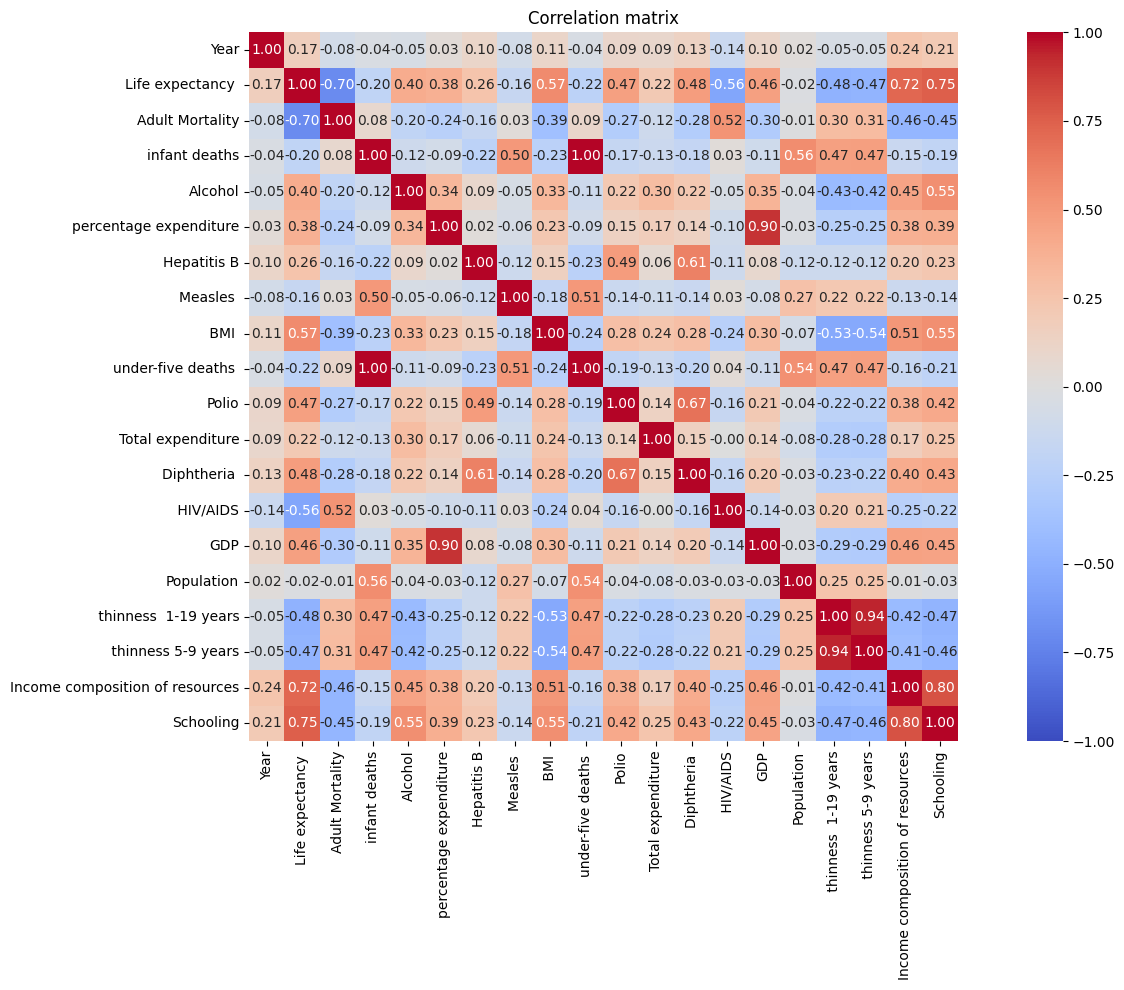

<Axes: title={'center': 'Correlation matrix'}>

In [5]:
visualiser.showCorrelationMatrix(df,figsize=(15,10))

In [6]:
new_df = data_analyzer.concatColumns(df, columns=[LifeEx.HEPATITIS_B.value,LifeEx.MEASLES.value,LifeEx.POLIO.value], new_column_name='Immunisation')

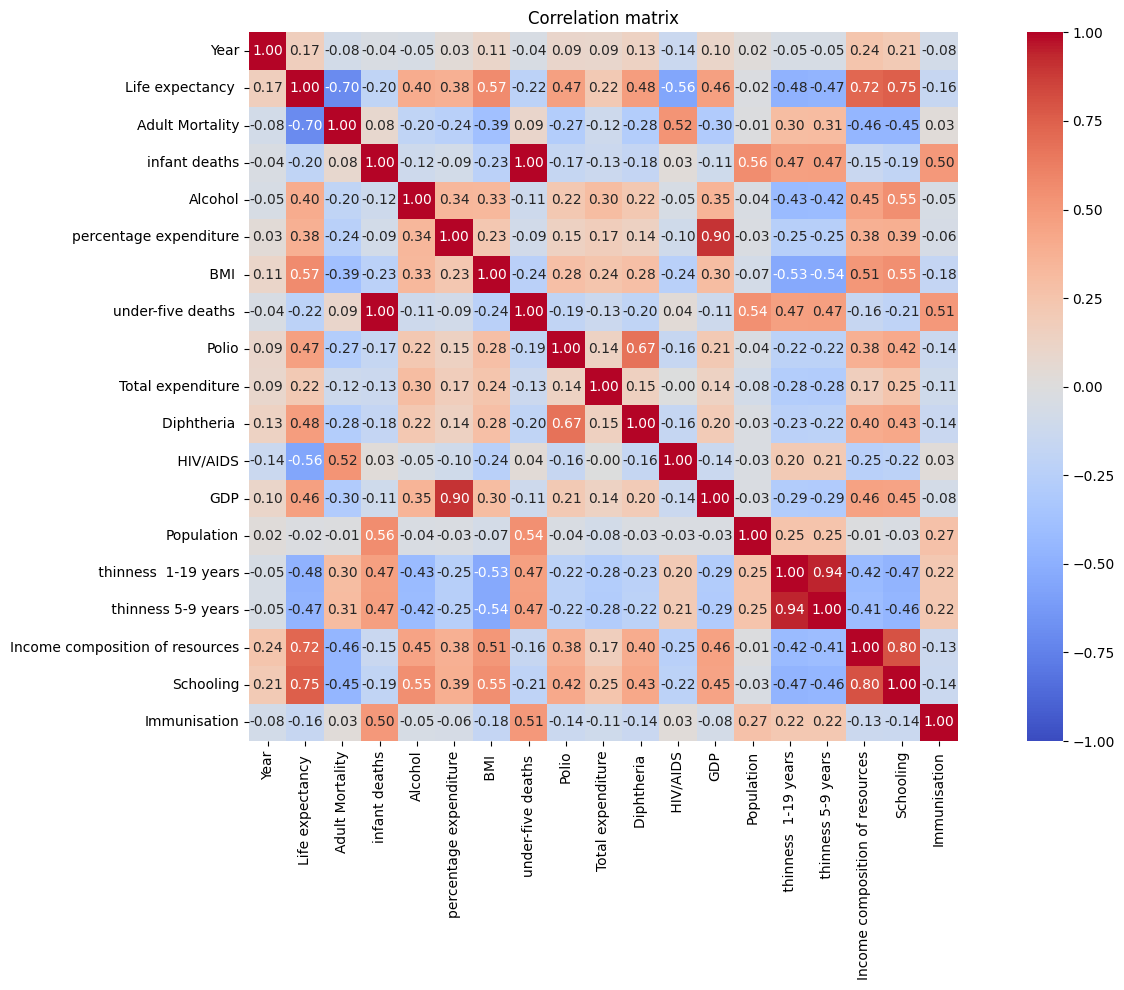

<Axes: title={'center': 'Correlation matrix'}>

In [7]:
visualiser.showCorrelationMatrix(new_df,figsize=(15,10))

In [8]:
newdf DataAnalyzer.concatColumns(df, columns=['colA','colB'], new_column_name='colA_colB')

SyntaxError: invalid syntax (3669823697.py, line 1)